In [1]:
import tensorflow_datasets as tfds
import popsign

2023-03-22 19:26:24.880447: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 19:26:25.444060: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-22 19:26:28.795935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-03-22 19:26:28.796138: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer

In [2]:
ds, info = tfds.load('pop_sign', data_dir=".", with_info=True)

2023-03-22 19:26:33.153350: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-03-22 19:26:33.153501: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-22 19:26:33.153634: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tensorflow-2-10-20230322-035223): /proc/driver/nvidia/version does not exist
2023-03-22 19:26:33.154796: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operatio

In [15]:
lengths = []

for example in ds["train"]:
    lengths.append(example["data"].shape[0])
    assert np.any(np.isnan(example["data"].numpy())) == False

In [7]:
import pandas as pd

pd.DataFrame(lengths).describe()

,0
count,75581.000000
mean,37.956973
std,44.228489
min,2.000000
25%,12.000000
50%,22.000000
75%,44.000000
max,537.000000


In [9]:
example["data"].shape

TensorShape([17, 543, 2])

(1.5, 0.0)

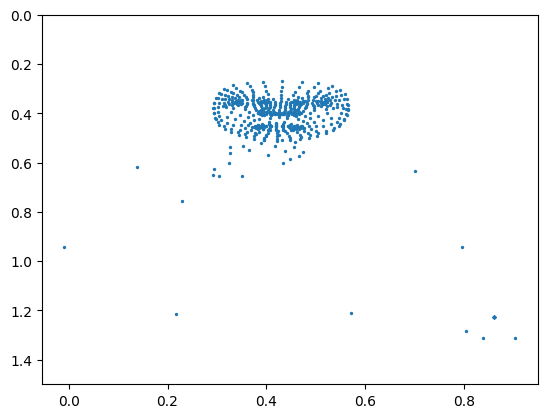

In [38]:
import matplotlib.pyplot as plt

ith_frame = 10
keypoints = example["data"]

plt.scatter(keypoints[ith_frame, :, 0], keypoints[ith_frame, :, 1], s=2)
plt.ylim((1.5, 0))

In [19]:
import sys
import tensorflow as tf

sys.path.insert(0, "../")
from preprocessing import Batch, AddRoot, SortColumns, Unbatch
from skeleton_graph import tssi_v2

tssi_order = tssi_v2()[1]

preprocessing_pipeline = tf.keras.Sequential([
    Batch(),
    AddRoot(),
    SortColumns(tssi_order),
    Unbatch()
])

(1.5, 0.0)

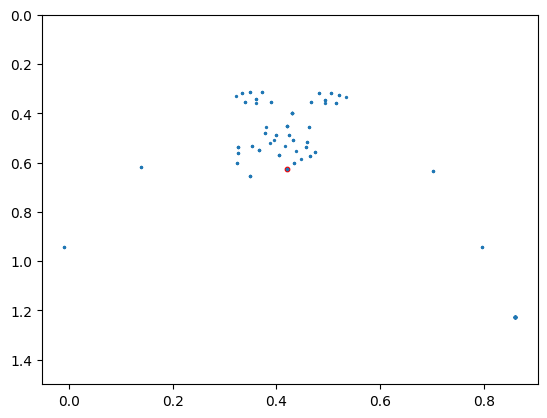

In [39]:
import matplotlib.pyplot as plt

ith_frame = 10
pp_keypoints = preprocessing_pipeline(example["data"])
plt.scatter(pp_keypoints[ith_frame, 0, 0], pp_keypoints[ith_frame, 0, 1], s=10, color="red")
plt.scatter(pp_keypoints[ith_frame, :, 0], pp_keypoints[ith_frame, :, 1], s=2)
plt.ylim((1.5, 0))